In [71]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [72]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [73]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [74]:
list(df_market_data.columns)

['price_change_percentage_24h',
 'price_change_percentage_7d',
 'price_change_percentage_14d',
 'price_change_percentage_30d',
 'price_change_percentage_60d',
 'price_change_percentage_200d',
 'price_change_percentage_1y']

In [75]:
# Are there missing values in the dataset? 
df_market_data.isnull().sum()

price_change_percentage_24h     0
price_change_percentage_7d      0
price_change_percentage_14d     0
price_change_percentage_30d     0
price_change_percentage_60d     0
price_change_percentage_200d    0
price_change_percentage_1y      0
dtype: int64

In [76]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [77]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
df_market_data_transformed  = StandardScaler().fit_transform(df_market_data[list(df_market_data.columns)])
df_market_data_transformed[:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [78]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(df_market_data_transformed, columns=list(df_market_data.columns), index = df_market_data.index)

# * Display sample data
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [79]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [80]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_values = KMeans(n_clusters=i, random_state=1)
    k_values.fit(df_market_data_scaled)
    inertia.append(k_values.inertia_)

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

In [81]:
# Create a dictionary with the data to plot the Elbow curve
elbow_dict = {'k': k, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_dict)
elbow_df.head()

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,63.858668


In [82]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.hvplot.line(
    x = 'k',
    y = 'inertia',
    title = 'Elbow Curve',
    xticks = 'k'
)

:Curve   [k]   (inertia)

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [83]:
# Initialise the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=4, random_state=1)

In [84]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(df_market_data_scaled)

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=1)

In [85]:
# Predict the clusters to group the cryptocurrencies using the scaled data
kmeans_model_predicitons = kmeans_model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(kmeans_model_predicitons)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [86]:
# Create a copy of the DataFrame
df_market_data_scaled_copy = df_market_data_scaled.copy()

In [87]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_scaled_copy['predicted_clusters'] = kmeans_model_predicitons

# Display sample data
df_market_data_scaled_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [88]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Colour the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_market_data_scaled_copy.hvplot.scatter(
    x = "price_change_percentage_24h",
    y = "price_change_percentage_7d",
    by = 'predicted_clusters',
    hover_cols = 'coin_id',
    title = 'Crypto Weekly Price Changes ',
    xlabel='Price Change Percentage (24h)',
    ylabel='Price Change Percentage (7d)'
)

:NdOverlay   [predicted_clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimise Clusters with Principal Component Analysis.

In [89]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components = 3)

In [90]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
components_reduction = pca_model.fit_transform(df_market_data_scaled)
# View the first five rows of the DataFrame. 
pca_df = pd.DataFrame(components_reduction, columns = ['PC1', 'PC2', 'PC3'])
pca_df.head()


,PC1,PC2,PC3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [91]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance_ratio = pca_model.explained_variance_ratio_
print(f"{round(sum(explained_variance_ratio)*100, 2)}%")

89.5%


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 
To find the total explained variance of the three principal components, we simply need to sum the explained_variance_ratio, then multiply it by 100 to showcase the precentage amount. In our case=> %89.5. So after implementing PCA the amount of data represented from the source scaled data in precentage is %89.5.
``` python
print(f"{round(sum(explained_variance_ratio)*100, 2)}%") => 89.5%. 
```

In [92]:
# Showing the feature representation of the dataset by PCA
pc_feature_representation = pd.DataFrame(
    pca_model.components_.T, 
    columns=['PC1', 'PC2', 'PC3'], 
    index= list(df_market_data_scaled_copy.columns)[0:7]
)
pc_feature_representation.style.background_gradient(cmap="viridis")

,PC1,PC2,PC3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


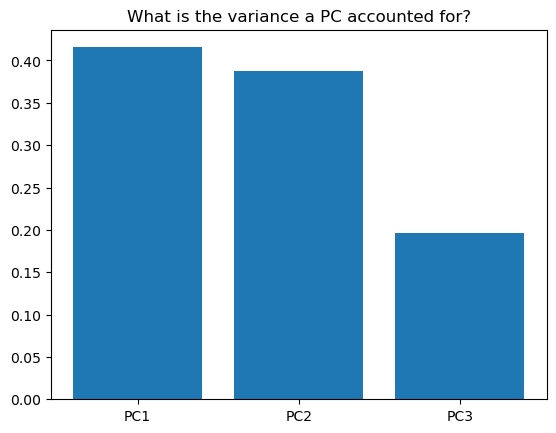

In [93]:
explained_variance = pca_model.explained_variance_

variance_accounted_per_pc = [var / sum(explained_variance) for var in explained_variance]

# * Applying a scree plot
plt.bar(x = ['PC1', 'PC2', 'PC3'], height = variance_accounted_per_pc)
plt.title("What is the variance a PC accounted for?");

In [94]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
pca_df.index = df_market_data_scaled.index

# Set the coinid column as index


# Display sample data
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [95]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [96]:
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_values = KMeans(n_clusters=i, random_state=1)
    k_values.fit(pca_df)
    inertia_pca.append(k_values.inertia_)

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

In [97]:
# Create a dictionary with the data to plot the Elbow curve
elbow_curve_pca_dict = {'k':k, 'inertia':inertia_pca} 
# Create a DataFrame with the data to plot the Elbow curve
elbow_curve_pca_df = pd.DataFrame(elbow_curve_pca_dict)

elbow_curve_pca_df.head()

,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,38.072792


In [98]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_curve_pca_df.hvplot.line(
    title = "Elbow Curve PCA",
    x = "k",
    y = "inertia"
)

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for `k` when using the PCA data is 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No it does not differ from the best k value found in the original data

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [99]:
# Initialise the K-Means model using the best value for k
kmeans_model_pca= KMeans(n_clusters=4, random_state=1)

In [100]:
# Fit the K-Means model using the PCA data
kmeans_model_pca.fit(pca_df)

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=1)

In [101]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_crypto_predictions = kmeans_model_pca.predict(pca_df)
# Print the resulting array of cluster values.
print(pca_crypto_predictions)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [102]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df_copy['predicted_clusters'] = pca_crypto_predictions

# Display sample data
pca_df_copy.head()

,PC1,PC2,PC3,predicted_clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


In [103]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Colour the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
pca_df_copy.hvplot.scatter(
    x ="PC1",
    y = "PC2",
    by = "predicted_clusters",
    hover_cols = 'coin_id'
)

:NdOverlay   [predicted_clusters]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualise and Compare the Results

In this section, you will visually analyse the cluster analysis results by contrasting the outcome with and without using the optimisation techniques.

In [104]:
# Composite plot to contrast the Elbow curves
elbow_df.hvplot.line(
    x = 'k',
    y = 'inertia',
    title = 'Elbow Curve',
    xticks = 'k'
) + elbow_curve_pca_df.hvplot.line(
    title = "Elbow Curve PCA",
    x = "k",
    y = "inertia"
)

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/holoviews/plotting/bokeh/plot.py:987: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  layout_plot = gridplot(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/holoviews/plotting/bokeh/plot.py:987: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  layout_plot = gridplot(


:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [105]:
# Composite plot to contrast the clusters
pca_df_copy.hvplot.scatter(
    x ="PC1",
    y = "PC2",
    by = "predicted_clusters",
    hover_cols = 'coin_id',
    title = "PCA plot"
) + df_market_data_scaled_copy.hvplot.scatter(
    x = "price_change_percentage_24h",
    y = "price_change_percentage_7d",
    by = 'predicted_clusters',
    hover_cols = 'coin_id',
    title = 'Crypto Weekly Price Changes ',
    xlabel='Price Change Percentage (24h)',
    ylabel='Price Change Percentage (7d)'
)


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/holoviews/plotting/bokeh/plot.py:987: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  layout_plot = gridplot(
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/holoviews/plotting/bokeh/plot.py:987: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  layout_plot = gridplot(


:Layout
   .NdOverlay.I  :NdOverlay   [predicted_clusters]
      :Scatter   [PC1]   (PC2,coin_id)
   .NdOverlay.II :NdOverlay   [predicted_clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

#### Answer the following question: 

  * **Question:** After visually analysing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 
  <br>
 With PCA, the trade-off is reducing the number of features(data used) at the expense of simplicity. Using PCA, we still managed to explain 89.5% of the data and were able to explain multi-dimensional data in 2Ds. Specifically, we enhanced the clarity of which samples are correlated and which aren't. 
<br><br>
 As shown above, the PCA plot provides a much clearer image of the clusters that correlate so we can differentiate between them. However, when PCA is not implemented, it is much more difficult to distinguish between the clusters that correlate. Specifically, cluster 2 seems to correlate with cluster 1 when it doesn't. 